# 3.2 - Reduccion de dimensiones

### PCA  (análisis de componente principal)

**PCA** es una transformación lineal usada para reducir dimensiones en los datos.

¿Por qué reducir dimensiones?

Existen varias razones, entre ellas:
+ Mejora de la performance
+ Mejor manejo de la dispersión de los datos
+ Maldición de las dimensiones (ojo-también existe la bendición)
+ etc...


Hay dos maneras diferentes de hacer ésta transformación:

+ A través de la matriz de correlaciones (dimensiones no homogéneas)
+ A través de la matriz de covarianzas (dimensiones homogéneas)

Ambas matrices son simétricas y diagonalizables. De hecho, el Teorema Espectral dice que si una matriz es hermítica, cuadrada y de dimensión finita, entonces existe una base de vectores propios donde dicha matriz puede ser representada.
Esto quiere decir que podemos cambiar de base para después proyectar, reduciendo las dimensiones e intentando conservar la máxima información en el nuevo subespacio.

![gio1](images/gioconda.jpeg)
![gio2](images/gioconda_lego.png)

#### Ejemplo intuitivo

In [1]:
import pylab as plt
%matplotlib inline

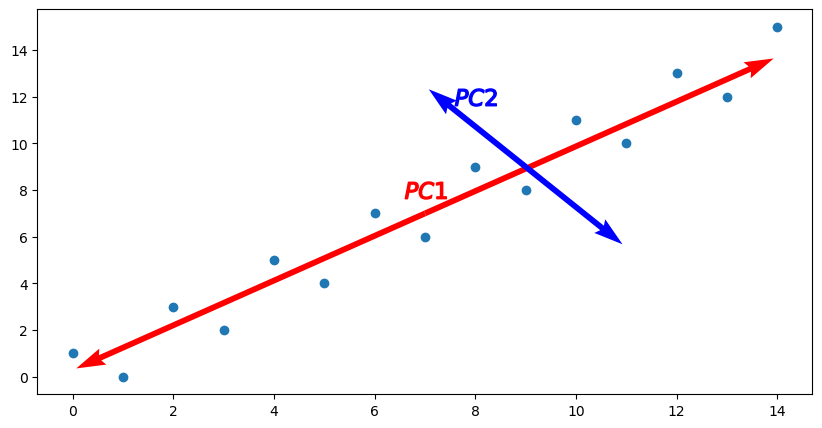

In [2]:
plt.figure(figsize=(10, 5))
plt.scatter([i for i in range(15)],
            [i+1 if i%2==0 else i-1 for i in range(15)])

plt.quiver(7, 7, 9, 4, color='r', scale=20)
plt.quiver(7, 7, -9, -4, color='r', scale=20)
plt.plot(7, 8, marker='$PC1$', ms=30, color='r')

plt.quiver(9, 9, -5, 4, color='b', scale=40)
plt.quiver(9, 9, 5, -4, color='b', scale=40)
plt.plot(8, 12, marker='$PC2$', ms=30, color='b');

Se rota y se proyecta, resultando:

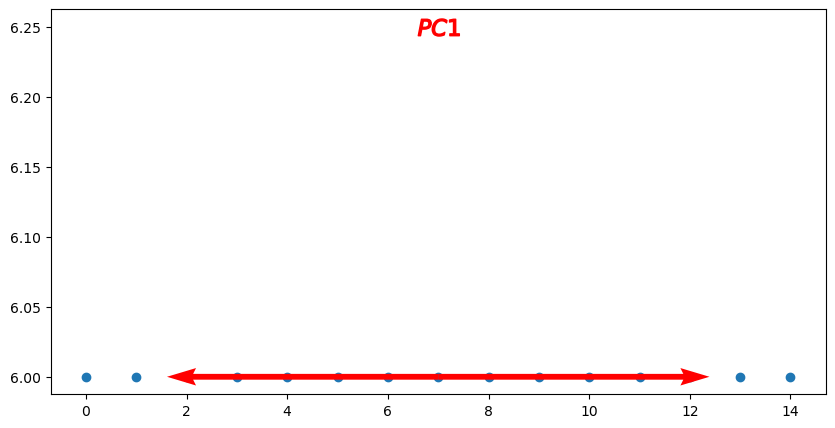

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter([i for i in range(15)],
            [6 for i in range(15)])

plt.quiver(7, 6, 7, 0, color='r', scale=20)
plt.quiver(7, 6, -7, 0, color='r', scale=20)
plt.plot(7, 6.25, marker='$PC1$', ms=30, color='r');

##### Resumen PCA

+ Normalización de los datos
+ Obtener base de vectores propios desde matriz de correlacion o covarianza
+ Ordenar los vectores propios de mayor a menor según sus dimensiones en el nuevo subespacio
+ Matriz de proyección, con los autovectores seleccionados (W)
+ Se transforma X (los datos) según W (matriz de proyección)

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler  # normalizacion

from sklearn.decomposition import PCA    # PCA

import warnings
warnings.simplefilter('ignore')

In [5]:
data=pd.read_csv('../data/pulsar_stars.csv')

data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
data=data.drop(columns=['target_class'])

In [7]:
data.shape

(17898, 8)

#### normalización

Recordemos, el primer paso de PCA es la normalización de los datos. 

Primero, veamos la **estandarización**  ($N(\mu, \sigma)$):

$$\frac{x-\mu}{\frac{\sigma}{\sqrt{n}}}$$

In [8]:
data_n_mano = (data - data.mean()) / data.std()

data_n = StandardScaler().fit_transform(data)


np.sum(data_n_mano - data_n)

 Mean of the integrated profile                 -1.574262e-15
 Standard deviation of the integrated profile   -1.292933e-14
 Excess kurtosis of the integrated profile       1.124968e-14
 Skewness of the integrated profile              2.359224e-15
 Mean of the DM-SNR curve                        5.086209e-15
 Standard deviation of the DM-SNR curve         -8.486267e-15
 Excess kurtosis of the DM-SNR curve            -1.931094e-14
 Skewness of the DM-SNR curve                    1.377370e-15
dtype: float64

Ahora el **MinMax** :

$$\frac{x-min}{max-min}$$

In [9]:
data_mm_mano=(data - np.min(data))/(np.max(data) - np.min(data))

data_mm=MinMaxScaler().fit_transform(data)

np.sum(data_mm_mano - data_mm)

 Mean of the integrated profile                  1.568736e-13
 Standard deviation of the integrated profile    5.547781e-14
 Excess kurtosis of the integrated profile       1.874941e-13
 Skewness of the integrated profile              6.680697e-14
 Mean of the DM-SNR curve                       -4.945127e-15
 Standard deviation of the DM-SNR curve          1.535528e-13
 Excess kurtosis of the DM-SNR curve            -3.709463e-13
 Skewness of the DM-SNR curve                   -3.247218e-14
dtype: float64

Se usa la standarización:

In [10]:
data = StandardScaler().fit_transform(data)

Se aplica **PCA**

In [11]:
pca = PCA()

pca.fit(data)


print(data.shape)


pca.explained_variance_ratio_

(17898, 8)


array([0.51675584, 0.26807564, 0.10116862, 0.0571781 , 0.03227836,
       0.01998491, 0.00255524, 0.00200328])

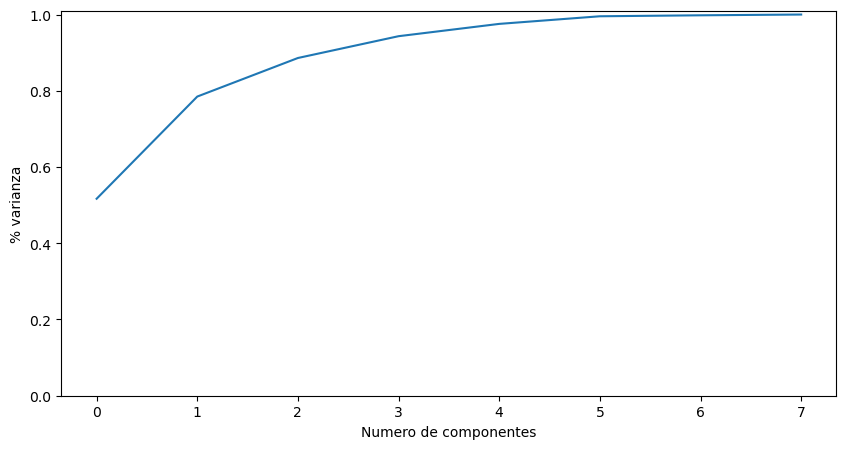

In [12]:
plt.figure(figsize=(10, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Numero de componentes')
plt.ylabel('% varianza')
plt.ylim([0, 1.01]);

In [13]:
pca = PCA(n_components=4)


data_pca = pca.fit_transform(data)


df = pd.DataFrame(data_pca)

df.head()

,0,1,2,3
0,-1.278849,-1.273133,0.016213,0.662102
1,-1.020553,-0.201162,0.670478,1.605779
2,0.188289,0.432114,-0.979766,-0.519232
3,-1.015466,-1.469881,-0.018832,0.938386
4,-0.822626,2.123651,0.407953,-0.380922


In [14]:
df.shape

(17898, 4)

In [15]:
pca.explained_variance_ratio_

array([0.51675584, 0.26807564, 0.10116862, 0.0571781 ])

In [16]:
sum(pca.explained_variance_ratio_)

0.9431781986997555

In [17]:
pd.DataFrame(data).head()

,0,1,2,3,4,5,6,7
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


In [18]:
pd.DataFrame(pca.inverse_transform(df)).head()

,0,1,2,3,4,5,6,7
0,0.726963,1.327427,-0.735075,-0.783587,-0.337221,-0.257022,-0.070554,-0.255592
1,-0.038332,1.811110,0.059444,-0.129622,-0.454226,-0.587282,0.417421,0.287539
2,-0.059363,-1.046436,-0.031402,0.033576,-0.428290,-0.159977,-0.140189,-0.349821
3,0.623153,1.549935,-0.607552,-0.691777,-0.309245,-0.172273,-0.269003,-0.486495
4,-0.366730,-0.849173,0.255278,0.285361,-0.451494,-0.797759,1.303397,1.398872


In [19]:
data=pd.read_csv('../data/pulsar_stars.csv')

X = data.drop('target_class', axis=1)

y = data.target_class

In [20]:
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import f1_score as f1

In [24]:
%%time

# SIN PCA

X_norm = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = tts(X_norm, y, train_size=0.8)


CPU times: user 9.49 ms, sys: 2.04 ms, total: 11.5 ms
Wall time: 9.82 ms


In [25]:
%%time


# SIN PCA

rfc = RFC()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(X_norm.shape)

f1(y_test, y_pred)

(17898, 8)
CPU times: user 1.73 s, sys: 15.9 ms, total: 1.75 s
Wall time: 1.75 s


0.8958990536277602

In [26]:
%%time

# CON PCA

X_norm = StandardScaler().fit_transform(X)

pca = PCA(n_components=4)


X_norm = pca.fit_transform(X_norm)


X_train, X_test, y_train, y_test = tts(X_norm, y, train_size=0.8)


CPU times: user 520 ms, sys: 14.6 ms, total: 534 ms
Wall time: 106 ms


In [27]:
%%time


# SIN PCA

rfc = RFC()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(X_norm.shape)

f1(y_test, y_pred)

(17898, 4)
CPU times: user 1.81 s, sys: 11.5 ms, total: 1.82 s
Wall time: 1.82 s


0.8706624605678234

### UMAP (uniform manifold aprox and projection)

Tiene dos pasos:

+ KNN con pesos, según topología (grafo)
+ Se reduce la dimensión basándose en esa topología

https://umap-learn.readthedocs.io/en/latest/

In [ ]:
%pip install umap-learn

In [28]:
import umap

import seaborn as sns

from sklearn.datasets import load_iris

In [30]:
load_iris().data.shape

(150, 4)

In [31]:
data = load_iris().data

In [32]:
reduc = umap.UMAP(n_components=2).fit_transform(data)

reduc.shape

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(150, 2)

In [33]:
load_iris().target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

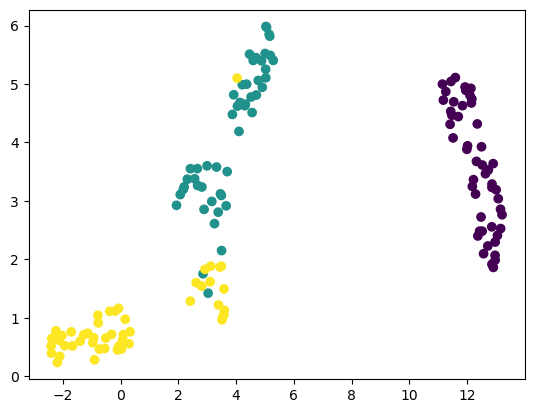

In [36]:
import pylab as plt

plt.scatter(reduc[:, 0],    # X
            reduc[:, 1],
            c=load_iris().target
           );

In [37]:
%%time

# SIN UMAP

X_norm = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = tts(X_norm, y, train_size=0.8)

rfc=RFC()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(X_norm.shape)

f1(y_test, y_pred)

(17898, 8)
CPU times: user 1.72 s, sys: 13.4 ms, total: 1.74 s
Wall time: 1.73 s


0.9108280254777071

In [38]:
%%time

# SIN UMAP

X_norm = StandardScaler().fit_transform(X)

X_norm = umap.UMAP(n_components=4).fit_transform(X_norm)

X_train, X_test, y_train, y_test = tts(X_norm, y, train_size=0.8)

rfc=RFC()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(X_norm.shape)

f1(y_test, y_pred)

(17898, 4)
CPU times: user 26.9 s, sys: 2.03 s, total: 28.9 s
Wall time: 11.6 s


0.84375

### t-SNE

**t-Distributed Stochastic Neighbor Embbeding**

Convierte similitudes entre los datos en probabilidad conjunta y trata de minimizar la divergencia _Kullback-Leibler_ (entropía relativa):

$$D_{KL}(P|Q)=\sum P(x)log(\frac{P(x)}{Q(x)})$$

https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

In [39]:
from sklearn.manifold import TSNE

In [40]:
tsne = TSNE(n_components=2, perplexity=10)

emb = tsne.fit_transform(load_iris().data)

emb = pd.DataFrame(emb, columns=['e1', 'e2'])

emb.head()

,e1,e2
0,-24.756304,-18.673134
1,-35.842056,-17.045902
2,-37.638042,-13.904361
3,-36.087978,-13.065989
4,-23.467644,-17.516630


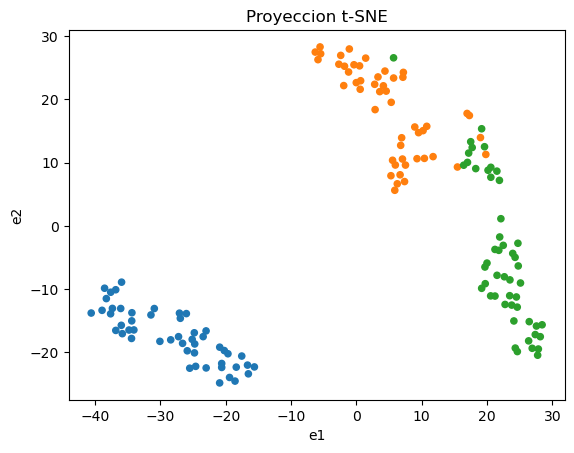

In [43]:
emb.plot.scatter(x='e1', 
                 y='e2', 
                 c=[sns.color_palette()[x] for x in load_iris().target])

plt.title('Proyeccion t-SNE');

In [44]:
%%time

# SIN TSNE

X_norm = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = tts(X_norm, y, train_size=0.8)

rfc=RFC()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(X_norm.shape)

f1(y_test, y_pred)

(17898, 8)
CPU times: user 1.75 s, sys: 7.64 ms, total: 1.76 s
Wall time: 1.81 s


0.8796433878157504

In [46]:
%%time

# CON TSNE

X_norm = StandardScaler().fit_transform(X)

X_norm = TSNE(n_components=2, perplexity=10).fit_transform(X_norm)

X_train, X_test, y_train, y_test = tts(X_norm, y, train_size=0.8)

rfc=RFC()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(X_norm.shape)

f1(y_test, y_pred)

(17898, 2)
CPU times: user 3min 50s, sys: 27 s, total: 4min 17s
Wall time: 37.9 s


0.8806451612903224

## Guardar modelo de machine learning

In [48]:
rfc.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [49]:
rfc

RandomForestClassifier()

In [50]:
# guardar el  modelo ML

import pickle

# guarda modelo en formato pk binario

pickle.dump(rfc, open('random_forest_pulsar.pk', 'wb'))   # wb escribe en binario

In [51]:
# cargar el modelo


modelo_rf = pickle.load(open('random_forest_pulsar.pk', 'rb'))  # rb lee en binario

In [52]:
modelo_rf

RandomForestClassifier()

In [53]:
y_pred = modelo_rf.predict(X_test)


f1(y_test, y_pred)

0.8806451612903224

In [54]:
pca

PCA(n_components=4)

In [55]:
pickle.dump(pca, open('pca_pulsar.pk', 'wb')) # escribe en binario

In [56]:
pickle.load(open('pca_pulsar.pk', 'rb')) # lee en binario

PCA(n_components=4)

In [57]:
modelo_rf

RandomForestClassifier()

In [58]:
# reentrenado desde el actual 

modelo_rf.fit(X_test, y_test)

y_pred = modelo_rf.predict(X_test)

f1(y_test, y_pred)

1.0